# Web Scraping Project: Job Posting Analysis

## Introduction:

This web scraping project was undertaken as part of, DATA200 - Data Systems for Data Analytics, course curriculum. The objective was to scrape job postings from Indeed.com, filter them based on specific keywords and location, and perform data analysis to extract insights about the job market.

Task: Scrape data from a job search website

Website: Indeed.com

Objective: Collect job postings that match certain keywords and location filters, and then perform data analysis to extract insights about the job market.

## Methodology:

#### 1. Data Collection:
- Utilized Selenium and Python for web scraping job postings from Indeed.com, aimed at analyzing the job market in the computer science field.
- Extracted information including job title, company name, job description, job location, and date posted for each job posting. 

#### 2. Data Cleaning:
Preprocessed the data by removing duplicates and performing necessary cleaning tasks to prepare it for analysis.

#### 3. Data Analysis and Vizualization:
- Conducted exploratory data analysis to derive insights about the job market.
- Analyzed the distribution of job titles and identified companies hiring the most for the given job titles and locations.
- Vizualize how relevant each job titles correspond to each location.

#### 4. Conclusion
The data report summarizes the key findings derived from the analysis of job postings scraped from Indeed.com for the computer science field. 

In [267]:
#importing needed dependenies
from selenium import webdriver
import pandas as pd
import numpy as np
import re
import requests
import time 
import random
import matplotlib.pyplot as plt

### Data Collection

In [126]:
#scraping job posting from a single page
def jobPosting():
    for i in range(1,16):
        #get job Title
        try:
            jobTitle = driver.find_element('xpath',\
                                       '//*[@id="mosaic-provider-jobcards"]/ul/li[{}]/div/div[1]/div/div[1]/div/table[1]/tbody/tr/td/div[1]/h2'\
                                       .format(i)).text
            
        except:
            jobTitle="N/A"
        
        #get company name
        try:
            companyName = driver.find_element('xpath',\
                                          '//*[@id="mosaic-provider-jobcards"]/ul/li[{}]/div/div[1]/div/div[1]/div/table[1]/tbody/tr/td/div[2]/span[1]'\
                                       .format(i)).text
        except:
            companyName = "N/A"
        #get company/job location
        try:
            location_el = driver.find_element('xpath',\
                                       '//*[@id="mosaic-provider-jobcards"]/ul/li[{}]/div/div[1]/div/div[1]/div/table[1]/tbody/tr/td/div[2]/div[1]'\
                                       .format(i)).text.split("\n")
            location = location_el[0]
        except:
            location = "N/A"
        #get the posed date of the job
        try:
            date_el = driver.find_element('xpath',\
                                   '//*[@id="mosaic-provider-jobcards"]/ul/li[{}]/div/div[1]/div/div[1]/div/table[2]/tbody/tr[2]/td/div/span'\
                                       .format(i)).text.split("\n")
            date = date_el[1]
        except:
            date = "N/A"
        #get the job description
        try:
            description = driver.find_element('xpath',\
                                          '//*[@id="mosaic-provider-jobcards"]/ul/li[{}]/div/div[1]/div/div[1]/div/table[2]/tbody/tr[2]/td/div[1]/div'\
                                       .format(i)).text
        except:
            description = "N/A"
        
        jobs.append([jobTitle, companyName, description, location, date])
    return jobs

In [127]:
#get url and get the next page
def get_job_url(num):
    to_format = "https://www.indeed.com/jobs?q=Computer+Science&l=Silicon+Valley%2C+CA&start={}".format(num)
    res = requests.get(to_format)
    return to_format

In [130]:
#scraping job postings from all 100 pages
df_job = pd.DataFrame()
jobs = []
for i in range(0, 1001, 10):
    driver = webdriver.Chrome(r"C:\Users\udval\Downloads\chromedriver.exe")
    driver.get(get_job_url(i))
    
    #get the job posting from single page
    job_posting = jobPosting()

    # find the location of the next page button
#     nextPage = driver.find_element('xpath','//*[@id="jobsearch-JapanPage"]/div/div/div[5]/div[1]/nav/div[3]/button')

    driver.quit()
    # wait between 2-3 seconds
    time.sleep(random.uniform(2,3))
    

C:\Users\udval\AppData\Local\Temp\ipykernel_7752\2400368206.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\udval\Downloads\chromedriver.exe")


In [131]:
df_job = pd.DataFrame(jobs, columns = ['Job Title','Company','Description','Location','Date Posted'])
df_job

,Job Title,Company,Description,Location,Date Posted
0,Cyber Security Engineer - Onsite,Vagaro,"Vagaro is seeking a motivated security engineer who brings strong security knowledge, skill set, and passion in securing modern cloud applications and…","Pleasanton, CA 94588",Active 5 days ago
1,EXPLORE - International Group Trainee Programme 2023 - Germany,ERGO GROUP,"Location, Munich (Germany) Munich Re, ERGO and MEAG. EXPLORE three companies in one trainee programme. EXPLORE is Munich Re Group’s international trainee…","Stanford, CA",Posted 30+ days ago
2,Cloud Solutions Architect / Engineer (Experienced),Sandia National Laboratories,"Posting Duration This posting will be open for application submissions for a minimum of seven (7) calendar days, including the ‘posting date’. Sandia…","Livermore, CA 94551",Posted 10 days ago
3,"Technology Analyst Program - Data Science (Sunnyvale, CA)","Fiserv, Inc.","Pay Range: $90,000 - $100,000 These pay ranges apply to employees in New York and California. Pay ranges for employees in other states may differ.…","Sunnyvale, CA 94085",Posted 23 days ago
4,Director of Information Security #517469,San Francisco State University,"Job no: 517469 Work type: Management (MPP) Location: San Francisco Categories: MPP, At-Will, Information Systems & Technology Working Title…","Hybrid remote in San Francisco, CA 94132",Active 2 days ago
...,...,...,...,...,...
1510,Sr. Human Resources Analyst,Boutique Recruiting,"Bachelor’s degree w/ coursework in Human Resources, public administration, business administration, computer science, information systems/technology, or a…","Oakland, CA 94606",Posted 30 days ago
1511,N/A,N/A,N/A,N/A,N/A
1512,Software Architect,Radancy,We are seeking a highly skilled software architect to design and oversee the implementation of complex software systems.,United States,Posted 14 days ago
1513,"Director, Software Development",MEMIC,"Comprehensive knowledge of information systems technology subjects and extensive knowledge of hardware and software, SDLC, DevOps, Agile Methodology with the…",Remote in United States,Just posted


### Data Cleaning 

##### Handling Missing Data:
Empty entries represented as "N/A" (empty data's) will be addressed by removing duplicate records from the dataset.

##### Location Formatting:
Extraneous details such as zip codes, states, or countries will be removed from the location data. Only the useful location information, such as remote, on-site, or hybrid status, and the specific city for on-site jobs, will be saved.

##### Date Posted Cleaning:
The "Date Posted" column will be cleaned so it only contains numerical values showing when the job was posted, omitting additional status  information such as "Active" or "Posted".

In [132]:
#iterate location to extract only the essential locations
cleaned_locations = []
for location in df_job['Location']:
    location = location.lower()  
    
    if "hybrid" in location and "remote" in location:
        cleaned_locations.append("Hybrid Remote")
    elif "hybrid" in location:
        cleaned_locations.append("Hybrid")
    elif "remote" in location:
        cleaned_locations.append("Remote")
    else:
        city = location.split(",")[0].strip()  
        cleaned_locations.append(city.title())

# Update the 'Location' column with cleaned information
df_job['Location'] = cleaned_locations

In [133]:
#geting only the relevant part of date posted
df_job['Date Posted'] = df_job['Date Posted'].str.extract(r'(\d+.*? ago)')
df_new = df_job.drop_duplicates()

In [269]:
df_new = df_new.dropna() #drop N/A data
df_new

,Job Title,Company,Description,Location,Date Posted
0,Cyber Security Engineer - Onsite,Vagaro,"Vagaro is seeking a motivated security engineer who brings strong security knowledge, skill set, and passion in securing modern cloud applications and…",Pleasanton,5 days ago
1,EXPLORE - International Group Trainee Programme 2023 - Germany,ERGO GROUP,"Location, Munich (Germany) Munich Re, ERGO and MEAG. EXPLORE three companies in one trainee programme. EXPLORE is Munich Re Group’s international trainee…",Stanford,30+ days ago
2,Cloud Solutions Architect / Engineer (Experienced),Sandia National Laboratories,"Posting Duration This posting will be open for application submissions for a minimum of seven (7) calendar days, including the ‘posting date’. Sandia…",Livermore,10 days ago
3,"Technology Analyst Program - Data Science (Sunnyvale, CA)","Fiserv, Inc.","Pay Range: $90,000 - $100,000 These pay ranges apply to employees in New York and California. Pay ranges for employees in other states may differ.…",Sunnyvale,23 days ago
4,Director of Information Security #517469,San Francisco State University,"Job no: 517469 Work type: Management (MPP) Location: San Francisco Categories: MPP, At-Will, Information Systems & Technology Working Title…",Hybrid Remote,2 days ago
...,...,...,...,...,...
1485,AWS Data Engineer,The Judge Group,"*Rate is DOE Description: We're seeking a hands-on Data Engineer that can design, code and provide Big Data Warehouse solutions for the team. The right…",Remote,30+ days ago
1486,Principal Software Engineer,Hertz,"JOB SUMMARY You will be building scalable systems and shipping features in a complex environment, where one must contend with challenges such as modernizing…",San Francisco,27 days ago
1488,Business Process Data Analyst,Robert Half,"Are you adept at creating action plans based on business needs and a proficient problem-solver? This Business Analyst will be responsible for the elicitation,…",Alameda,6 days ago
1489,Senior Security Hardware Design Engineer,BOEING,"Job Description At Boeing, we innovate and collaborate to make the world a better place. From the seabed to outer space, you can contribute to work that…",Pleasanton,10 days ago


### Data Analyzing and Visualization

#### 1. Top Hiring Companies and Job Titles
Let's start by examining which companies are actively recruiting and the job titles they are seeking.

In [260]:
result_title = df_new.groupby("Company").agg({"Job Title":"count"}).sort_values(by="Job Title", ascending=False)
result_title = result_title.rename(columns={"Job Title": "count"})
# Add the original "Job Title" column
result_title["Job Title"] = df_new.groupby("Company")["Job Title"].apply(list)

In [261]:
result_title.head(10)

,count,Job Title
Company,,
Apple,49,"[Software Developer in Test (Computer Vision ), Software Engineer, Apple Pay, Software Screener / Integration Engineer - Fitness, Health Software Automation Engineer, Wireless Bluetooth Software Engineer, JavaScript Virtual Machine Compiler Engineer, Software Test Engineer, Hardware Engineer - Early Career, Quality Engineer - Home, Computer Vision Data Scientist, Core Audio Software Engineer, Workflow Systems Analyst, ML Data and Search Engineer - SPG, FaceTime Networking Framework Engineer - Applied Networking, System Frameworks Software Engineer - App Intents, Xcode Cloud- Web Engineer, Malware Threat Reduction Manager, Speech Scientist / Engineer (Interspeech 2022), Performance Engineer, Business Systems & Data Analyst - Data Solutions & Initiatives, AR/VR Embedded SW and Prototyping, RF Software Engineer, Software Engineer, Security, Computer Vision/Deep Learning Algorithms Engineer, High-Performance C++ SWE (machine learning), GNSS Validation Engineer, Fullstack Software Engineer - SPG, AppleCare Finance, Pricing Analyst, Test and Evaluation Engineer, Autonomous Systems, Core OS Display Driver Engineer, Location Estimation Engineer, Data Platform Solution Architect, Senior Manager of Infrastructure Readiness, 3D Graphics SWE (C++ and Swift), Engineering Project Manager, Charging CoreOS, Technical UX Designer, AIML - Platform Engineer, Siri Understanding, Senior Automation QA Engineer, Manager, CoreOS Engineering Project Management, Setup Manager: System Experience, HID-Haptics Firmware Engineer, Vulnerability Research Manager, Staff Contacts Frameworks Engineer, Natural Language Generation, Research Engineer, Input Experience, Director of Kernel Technologies, Core Audio DSP Engineer, HomePod Engineering Manager, Software Integration Manager (C++) for CVML Algorithm Team, AR/VR Graphics/Multimedia Processing Engineer]"
Tesla,31,"[Motion Planning Software Engineer, Autonomy, Desktop Support Technician [Palo Alto, CA], Data Scientist, Charging Data and Modeling, ML Compiler Engineer, AI Compiler, Autopilot Dojo, Frontend Software Engineering, Applications Engineering (Fall 2023), Full Stack Software Engineer, Autopilot / Tesla Bot - AI Tooling, Machine Learning Engineer, LLM, Autopilot AI (Dojo), Security Software Development, Detections - Vehicle Software, Embedded Software Engineer, Tesla Bot / Drive Inverter, Third Party Risk Analyst, Software Validation Engineer – Ethernet Communication Architecture, Tesla Recharge “Returnship” Program – Integration Engineer, Vehicle Firmware, Staff Sales and Deliver Analyst, Video Games Engineer, Infotainment Software, Senior Sales and Delivery Analyst, Engineer, Chassis Product Support, Software Release Technical Program Manager, Vehicle Software (Fall 2023), Data Engineer, Red Team Security Engineer, Vehicle Software, Product Engineer, Charging, Brake, Steering, Stability, Traction Controls Software Engineer, Mobile Software Engineer, Infotainment Automation, Software Tools Product Manager, Simulation Engineer - Robotics, Embedded Software / Firmware Engineer, Low Voltage Power Distribution, DSP Software Engineer - Sensor Development, Automation Software Engineer, IT Field Support Technician (Fremont, CA), Sr. Business Intelligence Developer, Analytics Platform, Third Party Risk Analyst, Associate Cell Materials Engineer, Cell Manufacturing]"
TikTok,22,"[Commerce Data Scientist, TikTok - USDS, Frontend Software Engineer, TikTok Ads Creative & Ecosystem, Data Analyst - Tiktok Ads, Data Engineer, Data Platform - USDS, Software Engineer, Web Platform, Backend Engineer, TikTok Playback Strategy Platform, Anti-Fraud Data Analyst - USDS, TikTok Commerce- PMO Lead, Software Engineer, Computer Vision - Intelligent Creation (San Jose), Audio Algorithm Engineer - Real Time Communication, Data Scientist - Tiktok Ads, Growth Marketing, Data Engineer, E-Commerce, Data Engineer, Experimentation & Evaluation-TikTok Data Platform, Software Engineer, Ads Machine Le

Upon reviewing the table, the top 10 hiring companies are actively seeking candidates for a diverse array of job titles. This observation highlights the broad scope of the computer science field, which includes numerous specializations and jobs.

For further analysis, let's examine the preferred locations of these companies and identify the most sought-after job titles in those locations. This will give us a better understanding of regional job preferences within the computer science industry.

In [253]:
result_location = df_new.groupby("Location").agg({"Job Title":"count"}).sort_values(by="Job Title", ascending=False)
top_10_locations = result_location
top_10_locations.head(10)

,Job Title
Location,
Remote,143
San Jose,142
Mountain View,90
Sunnyvale,84
Santa Clara,80
Hybrid Remote,80
Palo Alto,64
Cupertino,57
San Francisco,44


It's interesting to see how job titles are distributed throughout different regions, especially considering the majority of remote and on-site jobs, as well as the popularity of certain areas like San Jose. <br>

We can gain a better understanding of the preferences of both employers and job seekers in the computer science sector through examining the data:
- The high number of remote job titles demonstrates the increasing acceptance and adoption of remote work arrangements within the industry, which could be attributed to technical improvements and changing workplace dynamics.
- The possibility of hybrid remote choices indicates a flexible approach to work arrangements, for individuals seeking a balance between remote and on-site work experiences.
- San Jose's position as a preferred location indicates that it is an major area for technology comapnies and computer science innovation.

In [270]:
# Group the data by company and location
grouped_df = df_job.groupby(['Company', 'Location'])

# Calculate the count of each job title for each company-location combination
job_title_counts = grouped_df['Job Title'].value_counts()
job_title_counts = job_title_counts.reset_index(name='Count')

# Filter the data for the top 10 locations
top_10_locations = job_title_counts['Location'].value_counts().head(10).index.tolist()
top_10_location_data = job_title_counts[job_title_counts['Location'].isin(top_10_locations)]

# Group the filtered data by company and calculate the total count of job titles
company_counts = top_10_location_data.groupby('Company')['Count'].sum()
top_10_companies = company_counts.nlargest(10).index.tolist()
top_10_company_data = top_10_location_data[top_10_location_data['Company'].isin(top_10_companies)]

# Group the filtered data by company and find the most common job title
most_common_titles = top_10_company_data.groupby('Company')['Job Title'].apply(
    lambda x: x.value_counts().idxmax()
).reset_index()


most_common_titles

,Company,Job Title
0,Apple,Business Systems & Data Analyst - Data Solutions & Initiatives
1,ByteDance,Data Scientist - Tiktok Ads/TCM Growth
2,CyberCoders,Head of Engineering: E-commerce
3,Google,"Senior Product Designer, Devices and Services"
4,Jobot,Embedded Firmware Engineer
5,Motion Recruitment,Senior Fullstack engineer / BioTech
6,Robert Half,Software Engineer - Backend Java Developer
7,Tesla,"Embedded Software / Firmware Engineer, Low Voltage Power Distribution"
8,The Mom Project,Software Quality Assurance Analyst
9,TikTok,"Data Engineer, Data Platform - USDS"


Initially, we identified the top hiring companies based on their consistent posting of job titles. Subsequently, we examined the most relevant locations corresponding to the frequency of job postings (job titles). By combining these analyses, we sought to understand which job titles are more closely associated with the hiring activities of specific companies. <br>

To our surprise, we discovered that job titles related to data, such as Data Engineer and Data Analyst, were more extensive than traditional software engineering or development roles. This observation underscores the increasing importance and demand for data-related expertise within the industry.

#### 2. Relationship Between Top 15 Job Titles and Locations:

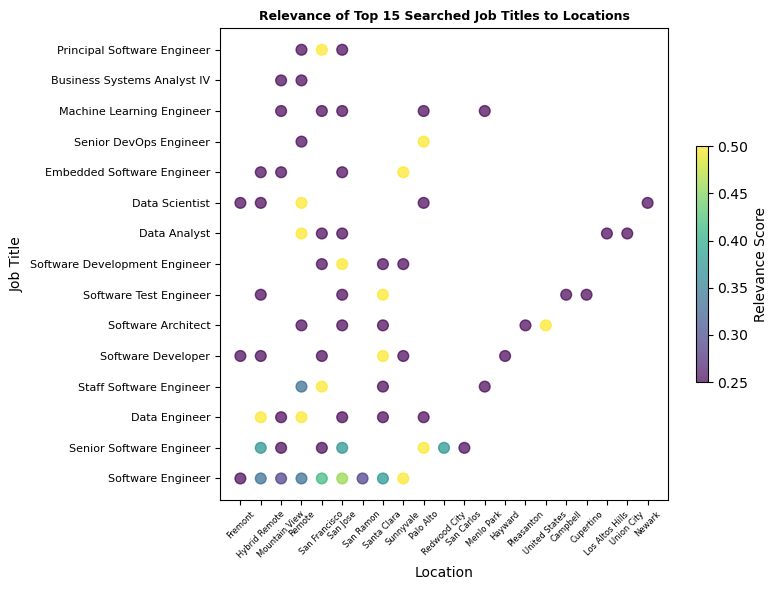

In [271]:
# Get the top 15 searched job titles
top_15_job_titles = df_new['Job Title'].value_counts().head(15).index.tolist()
top_15_jobs = df_new[df_new['Job Title'].isin(top_15_job_titles)]

# Calculate the relevance scores for each job title in each location
title_relevance_scores = top_15_jobs.groupby(['Job Title', 'Location']).size().reset_index(name='Count')
title_relevance_scores['Relevance'] = title_relevance_scores.groupby('Job Title')['Count'].transform(lambda x: x / x.sum())

#Scatter Plot
plt.figure(figsize=(8, 6))
for title in top_15_job_titles:
    title_locations = title_relevance_scores[title_relevance_scores['Job Title'] == title]
    relevance_scores = title_locations['Relevance'].values
    plt.scatter(title_locations['Location'], [title] * len(title_locations),
                c=relevance_scores, cmap='viridis', s=60, alpha=0.7)
plt.xlabel('Location', fontsize=10)
plt.ylabel('Job Title', fontsize=10)
plt.title('Relevance of Top 15 Searched Job Titles to Locations', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=6)
plt.yticks(fontsize=8)
plt.colorbar(label='Relevance Score', shrink=0.5)
plt.tight_layout()
plt.show()

1. The plot provides an overview of the relevance of each job title across different locations. The color gradient of the scatter points signifies the relevance score, with darker shades indicating higher relevance. Notably, specific job titles exhibit varying levels of relevance in different locations, with some demonstrating higher relevance than others. 
<br>
2. Certain job titles emerge as particularly relevant in specific locations. For instance, "Software Developer" and roles related to data display consistently high relevance across multiple locations. Conversely, "Software Engineer" maintains a steady relevance level across specific locations, with some instances showing elevated relevance while others remain average. This observation suggests that certain job titles may be in greater demand or more commonly sought after in particular geographic areas.

### Conclusion

In summary, our examination of the computer science job market has unveiled intriguing patterns and insights. Despite expectations for traditional software engineering roles to dominate, we discovered a significant demand for data-related positions, indicating a shifting landscape where data analytics and management play pivotal roles across industries. Additionally, the prevalence of remote work options underscores a broader trend towards flexibility in employment arrangements, presenting both opportunities and challenges for professionals and organizations alike.

Furthermore, the analysis highlights the importance of staying attuned to evolving market dynamics. As technology continues to advance and industries undergo digital transformation, the skills and roles in demand are likely to evolve as well. By leveraging these insights, stakeholders can adapt their strategies to remain competitive in a rapidly changing job market, ensuring alignment with emerging trends and opportunities within the computer science field.